# $m_{4\ell}$ analysis

Let's start off with a "dumb" analysis: a binned histogram analysis using $m_{4\ell}$ as the summary statistic.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import importlib

from hstar import c6
from inference import pois

In [40]:
# read dataset
lumi = 3000.0

# cross-section x k-factor [fb]
ggzz2e2m = c6.Sample(k=1.83, xs=1.4783394, events=pd.read_csv('/raven/u/taepa/mcfm/events/ggZZ2e2m_all/events.csv',nrows=1000000))
ggzz4e = c6.Sample(k=1.83, xs=0.47412769, events=pd.read_csv('/raven/u/taepa/mcfm/events/ggZZ4e_all/events.csv',nrows=1000000))
ggzz4m = c6.Sample(k=1.83, xs=0.47412769, events=pd.read_csv('/raven/u/taepa/mcfm/events/ggZZ4m_all/events.csv',nrows=1000000))
ggzz2e2m.normalize(lumi)
ggzz4e.normalize(lumi)
ggzz4m.normalize(lumi)

# concatenate all events into one sample
ggzz = c6.Sample(k=1.83, xs=1.4783394+0.47412769+0.47412769, events = pd.concat([ggzz2e2m.events, ggzz4e.events, ggzz4m.events]))
ggzz.sm_msq_key = 'msq_sbi_sm'
ggzz.c6_msq_map = {
  -5 : 'msq_sbi_c6_6',
  -1 : 'msq_sbi_c6_10',
  0 : 'msq_sbi_c6_11',
  1 : 'msq_sbi_c6_12',
  5 : 'msq_sbi_c6_16'
}
ggzz.events.head()

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,msq_sig_c6_19,msq_int_c6_19,msq_sbi_c6_19,msq_sig_c6_20,msq_int_c6_20,msq_sbi_c6_20,msq_sig_c6_21,msq_int_c6_21,msq_sbi_c6_21,wt
0,0,0.0,0.0,-195.32320,-195.32320,0.0,0.0,54.23740,-54.23740,-4.247556,...,2.051790e-10,-8.223194e-10,1.323928e-08,1.950328e-10,-8.029987e-10,1.324845e-08,1.838184e-10,-7.810834e-10,1.325915e-08,0.000900
1,1,0.0,0.0,-96.28981,-96.28981,0.0,0.0,92.20487,-92.20487,-28.016310,...,1.277027e-10,-5.537373e-10,1.386738e-08,1.219553e-10,-5.427674e-10,1.387260e-08,1.155880e-10,-5.303150e-10,1.387868e-08,0.023440
2,2,0.0,0.0,-167.67200,-167.67200,0.0,0.0,76.07164,-76.07164,-14.601730,...,5.550639e-11,-2.961814e-10,7.703880e-09,5.213969e-11,-2.869017e-10,7.709793e-09,4.845677e-11,-2.764313e-10,7.716580e-09,0.000180
3,3,0.0,0.0,-73.39238,-73.39238,0.0,0.0,386.09270,-386.09270,35.364550,...,1.944437e-12,-3.364839e-12,1.025368e-10,1.919063e-12,-3.124387e-12,1.027519e-10,1.893200e-12,-2.850493e-12,1.029999e-10,0.000661
4,4,0.0,0.0,-296.38940,-296.38940,0.0,0.0,31.99196,-31.99196,-57.723710,...,1.076842e-10,-5.071508e-10,8.909091e-09,1.026555e-10,-4.961647e-10,8.915048e-09,9.709287e-11,-4.836978e-10,8.921952e-09,0.078157


In [41]:
# compute m4l
ileptons = range(3,7)
p4l_px = np.sum([ggzz.events[f'p{i}_px'] for i in ileptons], axis=0)
p4l_py = np.sum([ggzz.events[f'p{i}_py'] for i in ileptons], axis=0)
p4l_pz = np.sum([ggzz.events[f'p{i}_pz'] for i in ileptons], axis=0)
p4l_E = np.sum([ggzz.events[f'p{i}_E'] for i in ileptons], axis=0)
m4l = np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

In [42]:
m4l_bins = np.arange(180.0,1020.0,20.0)
m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])

m4l_bins = np.arange(180,1000,20)
m4l_sm_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])


In [43]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True, height_ratios=(2,1))

# m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
# ax1.step(m4l_bins[:-1], m4l_sm, where='post', label='SM')

# c6_val = -10.0
# m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
# ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
# ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
# ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

# c6_val = +10.0
# m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
# ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
# ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
# ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

# ax1.set_xlim(200,1000)
# ax1.set_ylabel('Number of Events')
# ax1.set_yscale('log')
# ax1.legend()

# ax2.set_ylim(0.8,1.2)
# ax2.set_xlabel('$m_{4\\ell}$ [GeV]')
# ax2.set_ylabel('$c_6$ / SM')

# plt.tight_layout()
# plt.show()

In [ ]:
c6_vals = np.array([-20,0,10,20,30])
nll = np.zeros_like(c6_vals)

m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
wts_c6 = ggzz.nu(c6_vals, per_event=True)
for i, c6_val in enumerate(c6_vals):
  m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=wts_c6[:,i])
  nll[i] = pois.nll(m4l_sm, m4l_c6)
nll = nll - np.min(nll)

(40,)
(40,)


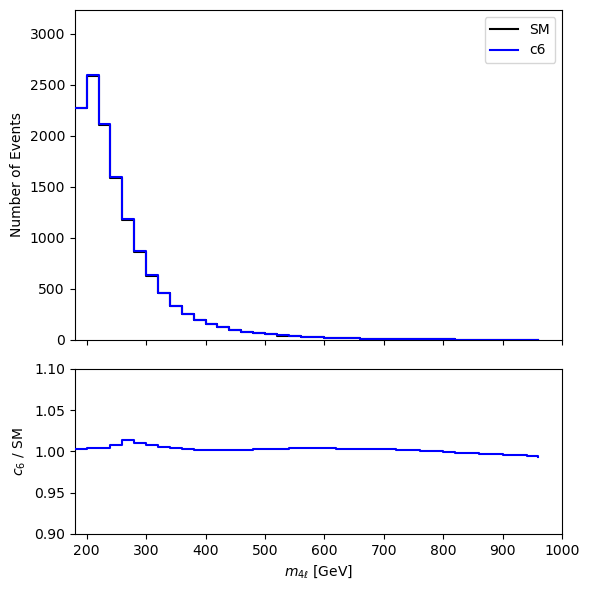

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, height_ratios=(2,1))

h_m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))

print(m4l_bins[:-1].shape)
print(h_m4l_sm.shape)

ax1.step(m4l_bins[:-1], h_m4l_sm, where='post', color='black', label='SM', zorder=10)

h_m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=wts_c6[:, 2])
ax1.step(m4l_bins[:-1], h_m4l_c6, where='post', color='blue', label='c6', zorder=10)

ax1.set_xlim(180,1000)
ax1.set_ylabel('Number of Events')
ax1.set_ylim(0, 1.25*np.max(h_m4l_sm))
# ax1.set_yscale('log')
ax1.legend()

ax2.step(m4l_bins[:-1], h_m4l_c6 / h_m4l_sm, where='post', color='blue', label='c6 / SM', zorder=10)
ax2.set_ylim(0.99,1.01)
ax2.set_xlabel('$m_{4\\ell}$ [GeV]')
ax2.set_ylabel('$c_6$ / SM')

plt.tight_layout()
plt.show()

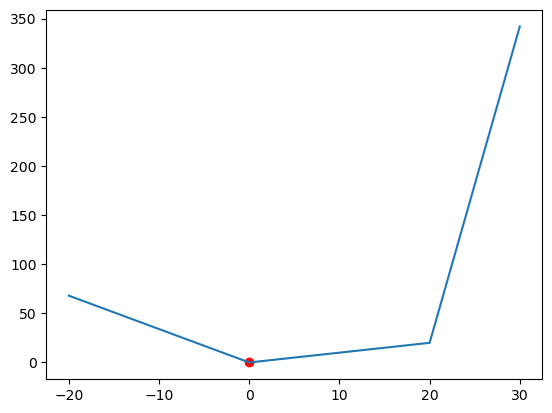

In [46]:
# find minimum
imin = np.argmin(nll)
nll_min = nll[imin]
c6_at_nll_min = c6_vals[imin]

# plot the scan + minimum
plt.plot(c6_vals, nll)
plt.scatter(c6_at_nll_min, nll_min, marker='o', color='red')
plt.show()

In [47]:
c6_vals = np.round(c6_vals, decimals = 1)
df = pd.DataFrame({'c6' : c6_vals, 'nll' : nll} )
df.to_csv('c6_nll_m4l.csv', index=False)